# PyTorch software benchmark analysis

Single node throughput comparisons between installation versions

In [1]:
import os
import re

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14})

## Load the results

In [4]:
def parse_log(log_file):
    train_pattern = re.compile('.*Train samples (\S+) time (\S+) s rate (\S+).*')
    valid_pattern = re.compile('.*Valid samples (\S+) time (\S+) s rate (\S+).*')
    results = {}
    with open(log_file) as f:
        for l in f:
            m = train_pattern.match(l)
            if m:
                results['train_samples'] = int(m.group(1))
                results['train_time'] = float(m.group(2))
                results['train_rate'] = float(m.group(3))
            m = valid_pattern.match(l)
            if m:
                results['valid_samples'] = int(m.group(1))
                results['valid_time'] = float(m.group(2))
                results['valid_rate'] = float(m.group(3))
    return results

In [5]:
benchmark_dir = os.path.expandvars('$SCRATCH/pytorch-benchmarks/cori-hsw/N1')
#versions = ['v0.4.0', 'v0.4.1', 'v1.0.0', 'v1.0.0-intel']
versions = ['v0.4.0', 'v0.4.1', 'v1.0.0', 'v1.0.0-intel', 'v1.1.0']

In [6]:
results = []
for version in versions:
    models = os.listdir(os.path.join(benchmark_dir, version))
    for model in models:
        log_file = os.path.join(benchmark_dir, version, model, 'out.log')
        if not os.path.exists(log_file):
            log_file = os.path.join(benchmark_dir, version, model, 'out_0.log')
        result = parse_log(log_file)
        result.update(version=version, model=model)
        results.append(result)
results = pd.DataFrame(results)

In [7]:
results

,model,train_rate,train_samples,train_time,valid_rate,valid_samples,valid_time,version
0,inceptionV3,7.11397,2048,287.88400,48.9974,2048,41.798100,v0.4.0
1,lstm,238.53300,2048,8.58593,376.4280,2048,5.440790,v0.4.0
2,alexnet,92.97200,2048,22.02810,374.4630,2048,5.469160,v0.4.0
3,resnet50,5.74947,2048,356.20600,25.0091,2048,81.890100,v0.4.0
4,vgg11,8.44930,2048,242.38700,27.6721,2048,74.009500,v0.4.0
5,cnn3d,36.80160,2048,55.64970,83.9317,2048,24.400800,v0.4.0
6,inceptionV3,5.63372,2048,363.52500,23.4821,2048,87.215500,v0.4.1
7,lstm,591.65300,2048,3.46178,2110.6700,2048,0.970321,v0.4.1
8,alexnet,88.74430,2048,23.07750,346.6170,2048,5.908540,v0.4.1
9,resnet50,5.22376,2048,392.05500,24.0222,2048,85.254600,v0.4.1


## Training throughput comparisons

In [8]:
models = results.model.unique()

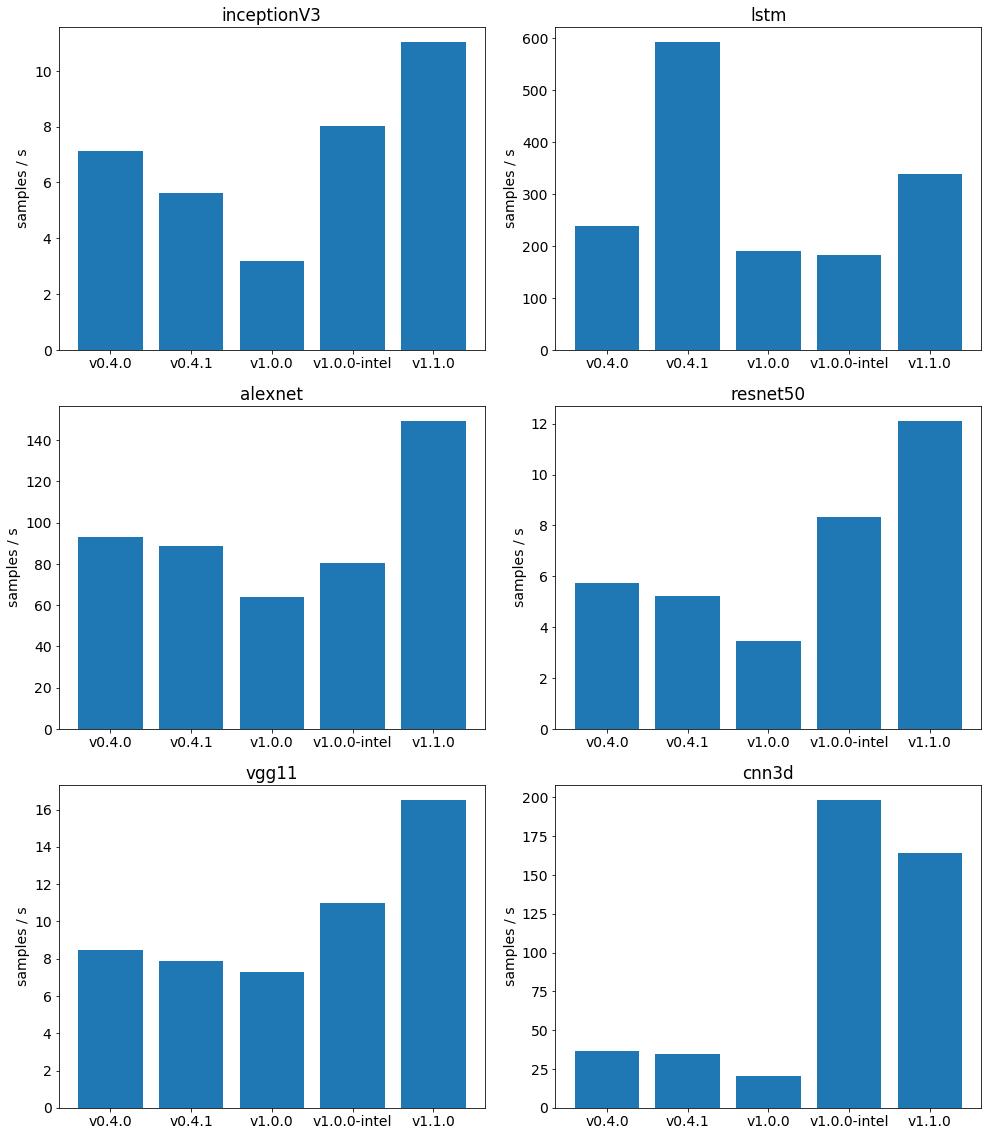

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model]
    ax.bar(model_results.version, model_results.train_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()

## Inference throughput comparisons

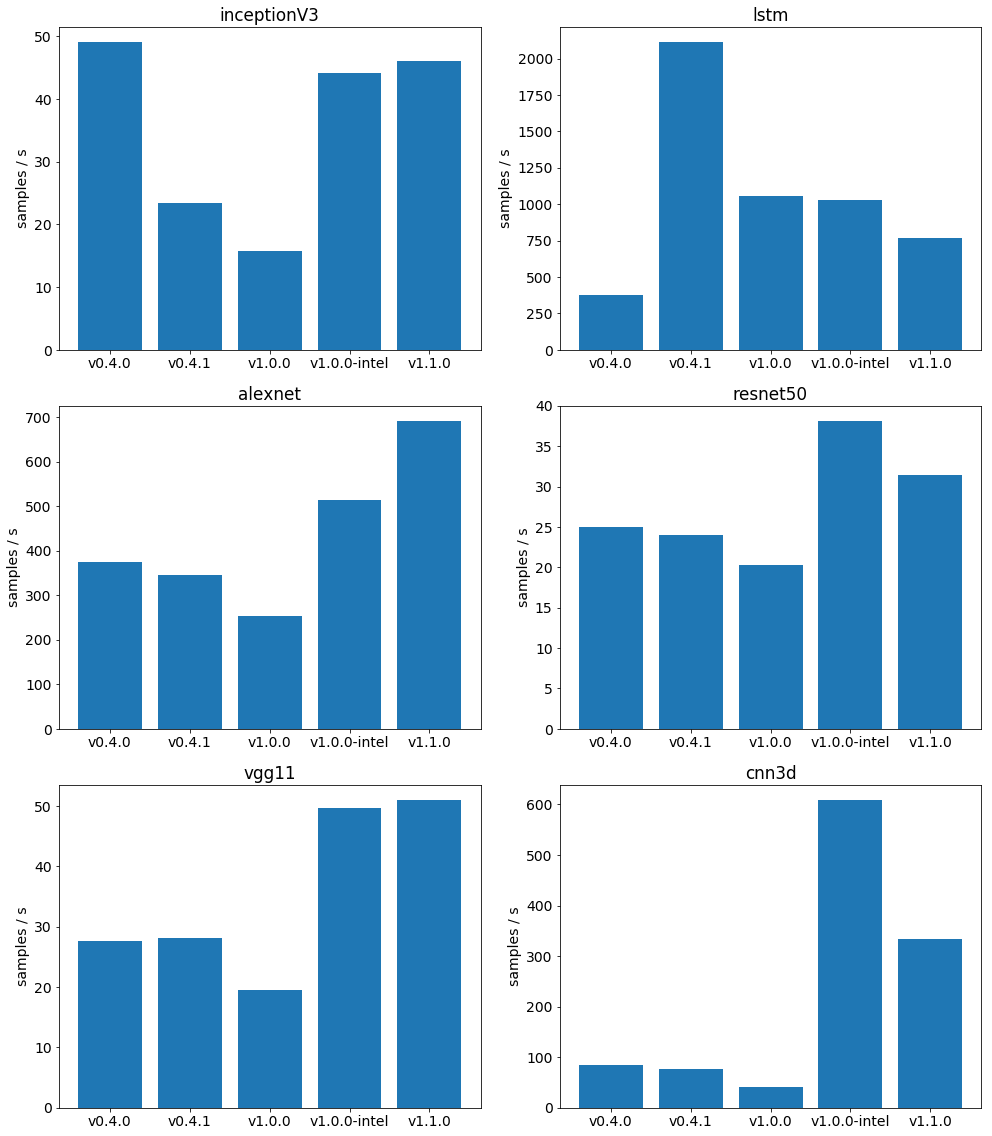

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model]
    ax.bar(model_results.version, model_results.valid_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()